In [22]:
from amex_default_prediction.utils import spark_session
from pyspark.ml.tuning import CrossValidatorModel
from pathlib import Path

intermediate_root = Path("../data/intermediate")
model_path = intermediate_root / "models/aft/20220711044610-0.8.0-6bbdfec"
spark = spark_session()
model = CrossValidatorModel.read().load(model_path.as_posix())
model

CrossValidatorModel_6e073837dc2f

In [2]:
from pyspark.sql import functions as F

df = spark.read.parquet(
    (intermediate_root / "train_data_preprocessed/data").as_posix()
).withColumn("label", F.col("target").cast("float"))
df.printSchema()

root
 |-- customer_ID: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- target: string (nullable = true)
 |-- label: float (nullable = true)



In [24]:
model.transform(df.limit(100)).show(vertical=True, n=3, truncate=80)

-RECORD 0-------------------------------------------------------------------------------------------------
 customer_ID           | 0005e52a3fa31b7eed49ceb576f011433ee2578833cd3f9d51c9dd9448a198ff                 
 features              | [0.6023457646369934,0.007704726420342922,0.49700069427490234,0.04169001430273... 
 target                | 1                                                                                
 label                 | 1.0                                                                              
 features_except_age   | [0.6023457646369934,0.007704726420342922,0.49700069427490234,0.04169001430273... 
 age                   | 209.0                                                                            
 censor                | 1.0                                                                              
 age_plus_one          | 210.0                                                                            
 prediction            | 243.46608103

In [26]:
pdf = model.bestModel.transform(df.limit(100)).toPandas()
pdf

f:\kaggle\amex\venv\lib\site-packages\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,customer_ID,features,target,label,features_except_age,age,censor,age_plus_one,prediction,quantiles_probability
0,0005e52a3fa31b7eed49ceb576f011433ee2578833cd3f...,"[0.6023457646369934, 0.007704726420342922, 0.4...",1,1.0,"[0.6023457646369934, 0.007704726420342922, 0.4...",209.0,1.0,210.0,243.466081,"[97.46837778700606, 134.8139801340021, 155.577..."
1,000adf2938f771f75a581b65107024eddeae70684778c0...,"[0.8077934384346008, 0.007917067036032677, 0.0...",0,0.0,"[0.8077934384346008, 0.007917067036032677, 0.0...",367.0,0.0,368.0,1308.897100,"[523.9993860883627, 724.7729410324041, 836.400..."
2,003aabfc58b05ba200e495df58b6c46170622f5e95c67f...,"[0.07608940452337265, 0.503859281539917, 0.017...",1,1.0,"[0.07608940452337265, 0.503859281539917, 0.017...",365.0,1.0,366.0,392.847512,"[157.27122875506743, 217.53065753662662, 251.0..."
3,004560462223c3e34e6d96f4d3aff34a49bd20b037b238...,"[0.7199313044548035, 0.4493969976902008, 0.051...",0,0.0,"[0.7199313044548035, 0.4493969976902008, 0.051...",364.0,0.0,365.0,622.599839,"[249.24948901383317, 344.7509481870206, 397.84..."
4,004ada9f90b75b78aa1992f641d58daa8ceca65312afd6...,"[0.7514593601226807, 0.004643425345420837, 0.0...",0,0.0,"[0.7514593601226807, 0.004643425345420837, 0.0...",361.0,0.0,362.0,944.668010,"[378.18515869357935, 523.0891046787035, 603.65..."
...,...,...,...,...,...,...,...,...,...,...
95,096e1b5547c7aa95fde7041fc199d70c3472fe6208b3ae...,"[0.8416891098022461, 0.006891798228025436, 0.0...",0,0.0,"[0.8416891098022461, 0.006891798228025436, 0.0...",365.0,0.0,366.0,724.297080,"[289.9626147619105, 401.06355593133617, 462.83..."
96,09912668346c35933fbf215f11bec35df294cd295eef78...,"[0.3804861903190613, 0.5906245112419128, 0.027...",1,1.0,"[0.3804861903190613, 0.5906245112419128, 0.027...",351.0,1.0,352.0,446.672883,"[178.8194933914237, 247.33527095654168, 285.42..."
97,09c48d2d91839073bb87d6e093dee367d03971722c854f...,"[0.7362323999404907, 0.0029227330815047026, 0....",0,0.0,"[0.7362323999404907, 0.0029227330815047026, 0....",379.0,0.0,380.0,588.834438,"[235.731963841997, 326.05410094945694, 376.271..."
98,0a0ef852b5f8a6178c38ef428c5e5ef29292f252bb162d...,"[0.47742611169815063, 0.5361353158950806, 0.04...",0,0.0,"[0.47742611169815063, 0.5361353158950806, 0.04...",214.0,0.0,215.0,265.868253,"[106.43678647999565, 147.2186892183416, 169.89..."


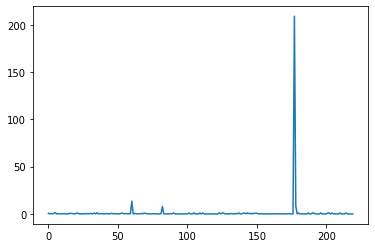

In [27]:
import matplotlib.pyplot as plt

plt.plot(pdf.features[0])

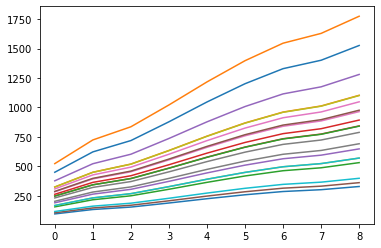

In [29]:
for i in range(20):
    plt.plot(pdf.quantiles_probability[i])
plt.show()

In [30]:
import numpy as np

np.array(pdf.features[0])[:20].sum()

5.535043838201091